In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

In [2]:
data=pd.read_csv("/content/IRIS.csv")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.describe().round(3)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [4]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.shape

(150, 5)

In [7]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data['species']=data['species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
x=data.drop(['species'],axis=1)
y=data['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [12]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [13]:
log.fit(x_train,y_train)

LogisticRegression()

In [14]:
predictions=log.predict(x_test)
print(predictions)

[0 0 0 2 0 0 1 0 1 0 2 2 1 2 2 1 0 2 1 1 2 2 2 2 2 2 1 2 2 1]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [16]:
print(cm)

[[ 8  0  0]
 [ 0  7  2]
 [ 0  1 12]]


In [17]:
print(ac)

0.9


In [18]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [19]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
predictions=forest.predict(x_test)
print(predictions)

[0 0 0 2 0 0 1 0 1 0 2 2 1 2 2 1 0 2 1 1 2 2 2 2 2 2 1 2 2 1]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [22]:
print(cm)

[[ 8  0  0]
 [ 0  7  2]
 [ 0  1 12]]


In [23]:
print(ac)

0.9


In [24]:
from sklearn.svm import SVC
svm=SVC()

In [25]:
svm.fit(x_train,y_train)

SVC()

In [26]:
predictions=svm.predict(x_test)
print(predictions)

[0 0 0 2 0 0 1 0 1 0 2 2 1 2 2 1 0 2 1 1 2 2 2 1 2 1 1 2 2 1]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [28]:
print(cm)

[[ 8  0  0]
 [ 0  8  1]
 [ 0  2 11]]


In [29]:
print(ac)

0.9


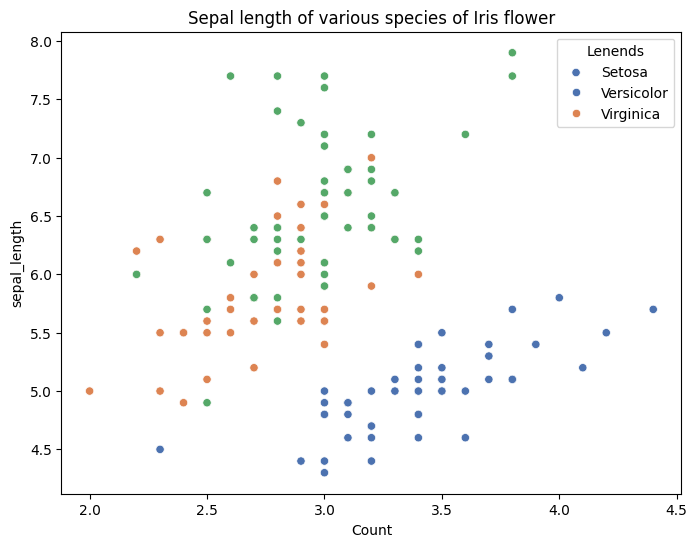

In [30]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='sepal_width', y='sepal_length', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

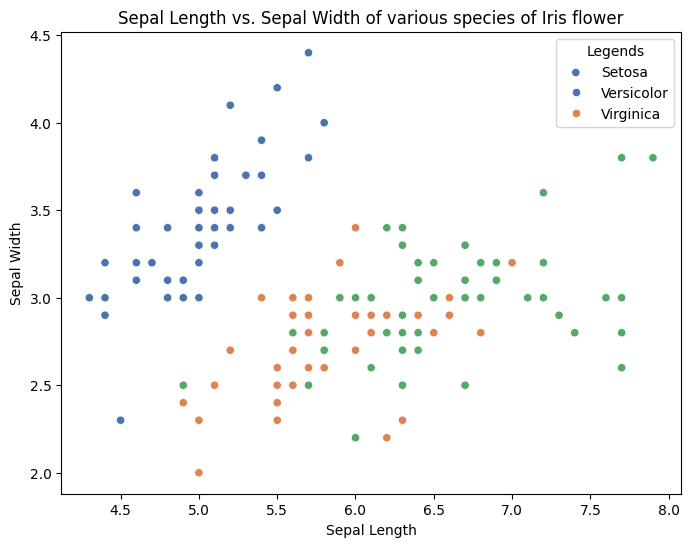

In [31]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette='deep', data=data)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width of various species of Iris flower')
plt.legend(title="Legends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

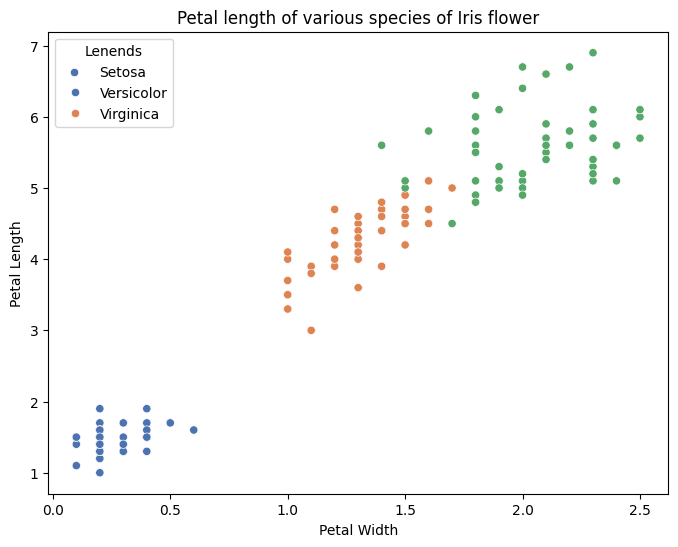

In [32]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='petal_width', y='petal_length', hue='species', palette='deep', data=data)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()

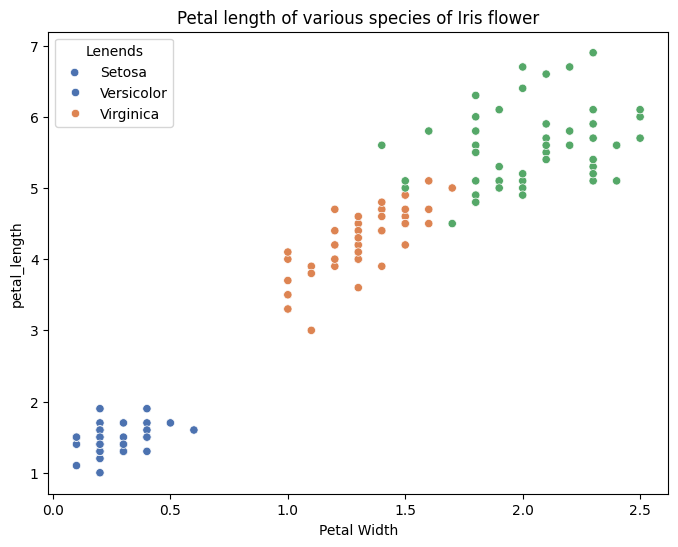

In [33]:
plt.figure(figsize=(8,6))
snr.scatterplot(x='petal_width', y='petal_length', hue='species', palette='deep', data=data)
plt.xlabel('Petal Width')
plt.title('Petal length of various species of Iris flower')
plt.legend(title="Lenends", labels=['Setosa','Versicolor','Virginica'])
plt.show()